<h3> The 3rd Assignment </h3>

Implement one of the segmentation methods and several operation of morphological methods without using library. Comparing the segmentation result with and without applying morphological processing. <br>

<b>Oleh</b> <br>
Nama    : A. Rifqi Afwan Muslihani <br>
NIM     : 20/462174/PA/20146

<h3> Import Library </h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

<h3>Initial Fuction</h3>

In [3]:
def plotimg(img):
  plt.imshow(img)
  plt.axis('off')

def plotgrayimg(img):
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.axis('off')

<h3>Take image file and make Histogram </h3>

In [9]:
filepath = 'brokenangel.jpg'
img = cv.imread(filepath)
imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imggray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

<h4> 1. RGB Histogram </h4>

(array([3.42560e+04, 3.55133e+05, 2.21250e+04, 1.56050e+04, 9.62500e+03,
        7.73700e+03, 6.67900e+03, 5.64300e+03, 5.19400e+03, 5.17900e+03,
        5.33800e+03, 5.49400e+03, 5.69600e+03, 6.07300e+03, 6.03200e+03,
        5.91800e+03, 5.93600e+03, 5.94100e+03, 6.00100e+03, 5.96400e+03,
        5.86000e+03, 5.97800e+03, 6.01700e+03, 5.67200e+03, 5.67400e+03,
        5.50700e+03, 5.46200e+03, 5.36000e+03, 5.21900e+03, 5.12500e+03,
        5.12200e+03, 5.29000e+03, 5.28900e+03, 5.40800e+03, 5.59400e+03,
        5.59600e+03, 5.85800e+03, 6.18200e+03, 6.72800e+03, 7.12100e+03,
        7.84600e+03, 8.58800e+03, 8.55600e+03, 7.84900e+03, 7.03400e+03,
        6.16900e+03, 5.59400e+03, 4.96100e+03, 4.61900e+03, 4.12400e+03,
        4.07500e+03, 3.87600e+03, 3.93800e+03, 3.71200e+03, 3.72900e+03,
        3.75400e+03, 3.55500e+03, 3.46700e+03, 3.45900e+03, 3.43100e+03,
        3.43900e+03, 3.28700e+03, 3.44300e+03, 3.21000e+03, 3.32700e+03,
        3.25900e+03, 3.34900e+03, 3.25800e+03, 3.36

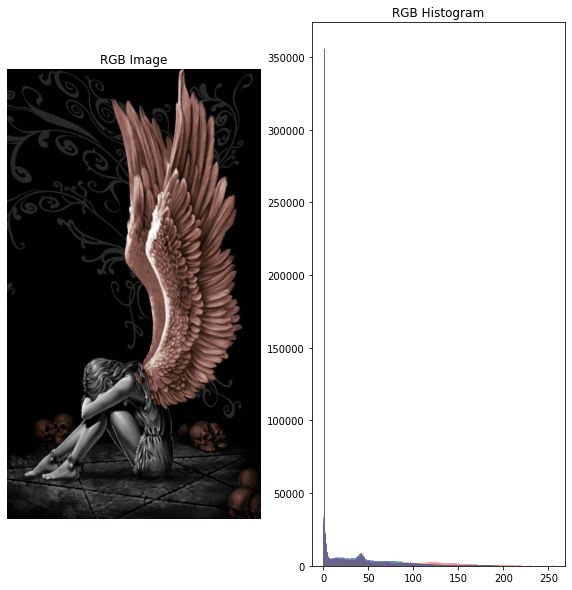

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('RGB Image')
plt.imshow(imgrgb)
plt.axis('off')  
plt.subplot(1,2,2)
plt.title('RGB Histogram')
plt.hist(imgrgb[:,:,0].ravel(), bins=256, range=(0, 256), color='red', alpha = 0.4)
plt.hist(imgrgb[:,:,1].ravel(), bins=256, range=(0, 256), color='green', alpha = 0.4)
plt.hist(imgrgb[:,:,2].ravel(), bins=256, range=(0, 256), color='blue', alpha = 0.3)


<h4>2. Gray Histogram </h4>

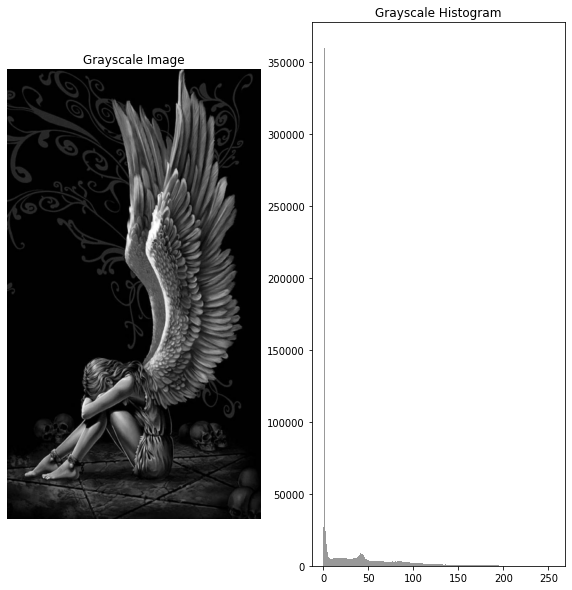

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Grayscale Image')
plt.imshow(imggray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Grayscale Histogram')
plt.hist(imggray.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

<h3> Tresholding Negative Segmentation </h3>

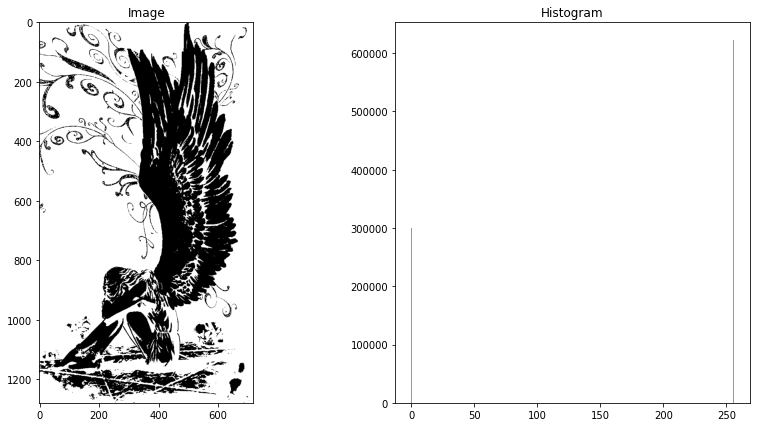

In [33]:
imgg1 = imggray.copy()
row = imgrgb.shape[0]
column = imgrgb.shape[1]

for row in range (row):
  for col in range (column):
    if imgg1[row][col]<40:
      imgg1[row][col] = 255
    else:
      imgg1[row][col] = 0

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Image')
plt.imshow(imgg1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('Histogram')
plt.hist(imgg1.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

<h3> Morphological Processing Fuction</h3>

In [30]:
def MPcnvl(src, kernel):
  rs = np.zeros((src.shape[0],src.shape[1]))
  ks = kernel.shape[0]
  kv = np.sum(kernel)
  src = np.pad(src, int((ks-1)/2), 'constant',  constant_values=0)
  sr = src.shape[0]
  sc = src.shape[1]

  for i in range(sr-(ks-1)):
    for j in range(sc-(ks-1)):
      region=src[i:(i+ks), j:(j+ks)]
      x = 0
      for k in range(ks):
        for l in range(ks):
          x = x + (region[k][l]*kernel[k][l])
      rs[i][j]=x/kv
  
  return(rs)
  
def dltn(src, kernel):  
  rs = MPcnvl(src, kernel)
  for i in range(rs.shape[0]):
    for j in range(rs.shape[1]):
      if(rs[i][j]>40):
        rs[i][j] = 255
      else:
        rs[i][j] = 0
  return(rs)
  
def ers(src, kernel):  
  rs = MPcnvl(src, kernel)
  for i in range(rs.shape[0]):
    for j in range(rs.shape[1]):
      if(rs[i][j]<40):
        rs[i][j] = 0
      else:
        rs[i][j] = 255
  return(rs)
  
def Fopen(src, kernel):  
  rs = ers(src, kernel)
  rs = dltn(rs, kernel)
  return(rs)
  
def Fclose(src, kernel):  
  rs = dltn(src, kernel)
  rs = ers(rs, kernel)
  return(rs)


<h3> Morphological Processing</h3>

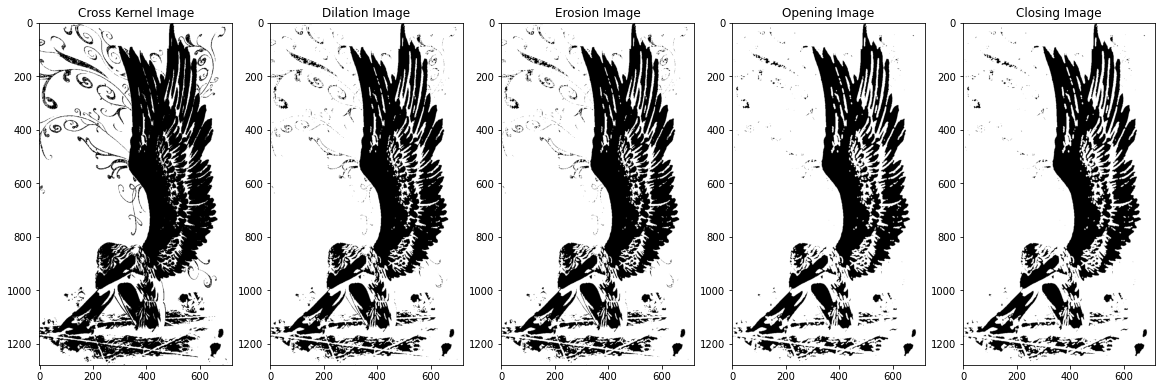

In [44]:
kernelCross = np.array([[0,1,0],[1,1,1],[0,1,0]])

imgDl = dltn(imgg1,kernelCross)
imgEr = ers(imgg1,kernelCross)
imgOp = Fopen(imgg1,kernelCross)
imgCl = Fclose(imgg1,kernelCross)

plt.figure(figsize=(20,10))

plt.subplot(1,5,1)
plt.title('Cross Kernel Image')
plt.imshow(imgg1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,2)
plt.title('Dilation Image')
plt.imshow(imgDl, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,3)
plt.title('Erosion Image')
plt.imshow(imgEr, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,4)
plt.title('Opening Image')
plt.imshow(imgOp, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,5)
plt.title('Closing Image')
plt.imshow(imgCl, cmap='gray', vmin=0, vmax=255)

plt.show()

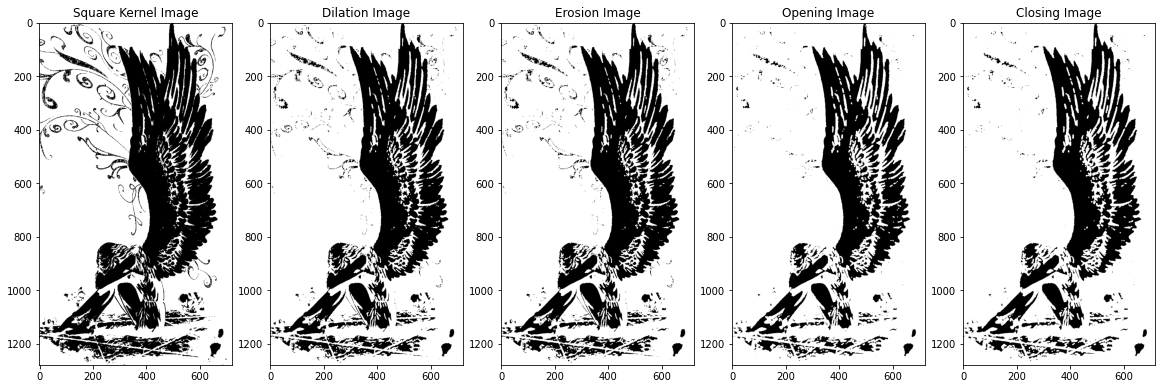

In [45]:
KrnlSq = np.array([[1,1,1],[1,1,1],[1,1,1]])

imgDl = dltn(imgg1,KrnlSq)
imgEr = ers(imgg1,KrnlSq)
imgOpe = Fopen(imgg1,KrnlSq)
imgCl = Fclose(imgg1,KrnlSq)

plt.figure(figsize=(20,10))

plt.subplot(1,5,1)
plt.title('Square Kernel Image')
plt.imshow(imgg1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,2)
plt.title('Dilation Image')
plt.imshow(imgDl, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,3)
plt.title('Erosion Image')
plt.imshow(imgEr, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,4)
plt.title('Opening Image')
plt.imshow(imgOp, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,5)
plt.title('Closing Image')
plt.imshow(imgCl, cmap='gray', vmin=0, vmax=255)

plt.show()

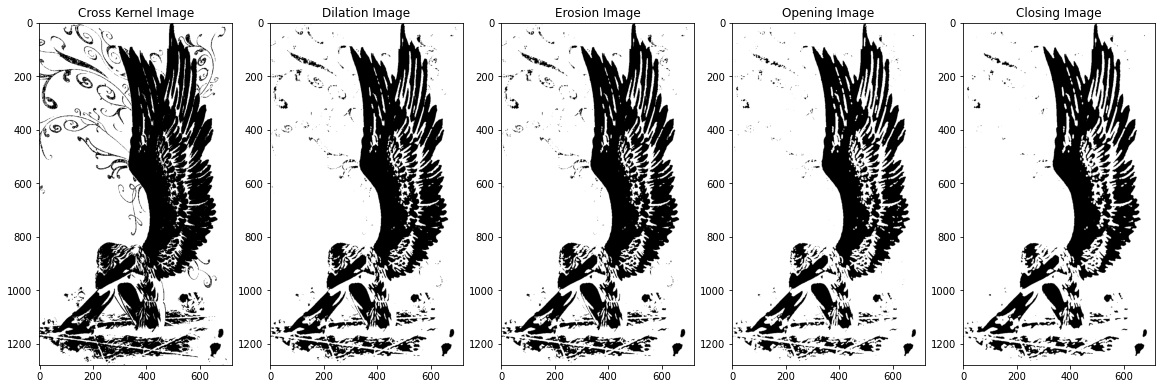

In [46]:
kernelCross5 = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]])

imgDl = dltn(imgg1,kernelCross5)
imgEr = ers(imgg1,kernelCross5)
imgOpe = Fopen(imgg1,kernelCross5)
imgCl = Fclose(imgg1,kernelCross5)

plt.figure(figsize=(20,10))

plt.subplot(1,5,1)
plt.title('Cross Kernel Image')
plt.imshow(imgg1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,2)
plt.title('Dilation Image')
plt.imshow(imgDl, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,3)
plt.title('Erosion Image')
plt.imshow(imgEr, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,4)
plt.title('Opening Image')
plt.imshow(imgOp, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,5)
plt.title('Closing Image')
plt.imshow(imgCl, cmap='gray', vmin=0, vmax=255)

plt.show()

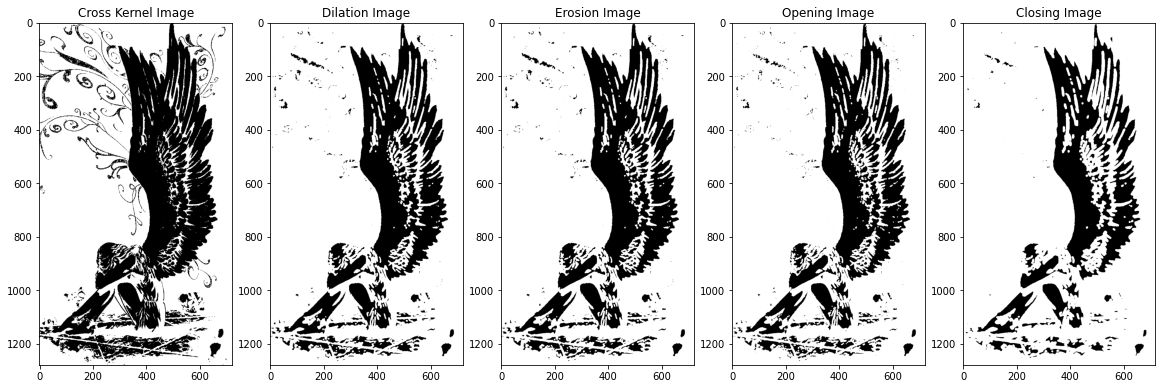

In [47]:
KrnlSq5 = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

imgDl = dltn(imgg1,KrnlSq5)
imgEr = ers(imgg1,KrnlSq5)
imgOpe = Fopen(imgg1,KrnlSq5)
imgCl = Fclose(imgg1,KrnlSq5)

plt.figure(figsize=(20,10))

plt.subplot(1,5,1)
plt.title('Cross Kernel Image')
plt.imshow(imgg1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,2)
plt.title('Dilation Image')
plt.imshow(imgDl, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,3)
plt.title('Erosion Image')
plt.imshow(imgEr, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,4)
plt.title('Opening Image')
plt.imshow(imgOp, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,5,5)
plt.title('Closing Image')
plt.imshow(imgCl, cmap='gray', vmin=0, vmax=255)

plt.show()